In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# About the Dataset
- **`Age (age)`**: The person’s age in years
- **`Sex (sex)`**: The person's sex
  - 1: male
  - 0: female
- **`Chest pain type (cp)`**: The type of chest pain the person experiences
  - 0: Typical Angina Chest Pain
  - 1: Atypical Angina Chest Pain
  - 2: Non-Anginal Chest Pain
  - 3: Asymptomatic Chest Pain
- **`Resting Blood Pressure (trestbps)`**: Resting Blood Pressure (in mm Hg) of the person on admission to the hospital
- **`Cholesterol (chol)`**: Serum cholestoral in mg/dl
- **`Fasting Blood Sugar (fbs)`**: If the person's Fasting Blood sugar level is greater or less than 120 mg/dl
  - 0: False (less than 120 mg/dl)
  - 1: True (greater than 120 mg/dl)
- **`Resting Electrocardiographic (restecg)`**: The person's ECG result when at rest to find whether T wave exists.
  - 0: Normal
  - 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: Probable or Definite Ventricular Hypertrophy
- **`Maximum Heart Rate Achieved (thalach)`**: The maximum heart rate (heart beat per minute) of the person
- **`Exercise induced Angina (exang)`**: If the person had an Anginal chest pain due to exercise. (Angina is caused when there is limited blood supply to the heart)
  - 0: No
  - 1: Yes
- **`ST depression induced by exercise (oldpeak)`**: Pressure of the ST segment of the wave in person's ECG compared to rest ECG
- **`Slope (slope)`**: Slope of the peak exercise ST segment of the wave in ECG of the person.
  - 0: upsloping
  - 1: flat
  - 2: downslopin
- **`Number of major vessels (ca)`**: Number of major vessels colored by flourosopy procedure of the person
  - 0, 1, 2 and 3
- **`Thalassemia (thal)`**: Categories of complications of the thalassemia defect.
  - 1: Normal
  - 2: Fixed Defect
  - 3: Reversable Defect
- **`Target (target)`**: The presence or absence of heart disease in the patient.
  - 0: Absence
  - 1: Presence

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Shape of the DataFrame
> Number of rows and columns in the dataframe are:

In [4]:
df.shape

(303, 14)

# Information about the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Description of the DataFrame
- Number of rows
- Mean and standard deviation of every column
- Min and max values of every column
- Value in every column that is greater than 25%, 50% and 75% of values

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data type of every column

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Unique values in every column
- Categorical Values:
  - sex
  - cp
  - fbs
  - restecg
  - exang
  - slope
  - ca
  - thal
  - target

- Numerical Values
  - age
  - trestbps
  - chol
  - thalach
  - oldpeak

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

> Column 'ca' has an extra categorical value. Replace the rows with this extra 'ca' value with **NaN**, and then fill with Median of 'ca' column in the rows with NaN.

In [9]:
df.ca.unique()

array([0, 2, 1, 3, 4])

In [10]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [11]:
df[df.ca==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [12]:
df.loc[df.ca == 4, 'ca'] = np.NaN

In [13]:
df.ca = df.ca.fillna(df.ca.median())

In [14]:
df.ca.unique()

array([0., 2., 1., 3.])

In [15]:
df.ca.isnull().sum()


0

> Column 'thal' has an extra categorical value. Replace the rows with this extra 'thal' value with **NaN**, and then fill with Median of 'thal' column in the rows with NaN

In [16]:
df.thal.unique()

array([1, 2, 3, 0])

In [17]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [18]:
df.loc[df.thal==0, 'thal'] = np.NaN

In [19]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

In [20]:
df.thal = df.thal.fillna(df.thal.median())

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> Remove duplicated row

In [22]:
dups = df[df.duplicated(keep=False)]
dups

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


> Drop the second duplicated row in place while keeping the first

In [23]:
df.drop_duplicates(keep='first',inplace=True)

In [24]:
df.shape

(302, 14)

> Change the columns names with understandable value.

In [25]:
df.columns = df.columns = ['age', 'sex', 'chest_pain_type', 'resting_BP', 'cholesterol', 'fasting_blood_sugar', 'rest_ECG', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_BP', 'cholesterol',
       'fasting_blood_sugar', 'rest_ECG', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [26]:
df

,age,sex,chest_pain_type,resting_BP,cholesterol,fasting_blood_sugar,rest_ECG,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0


# Exploratory Data Analysis 

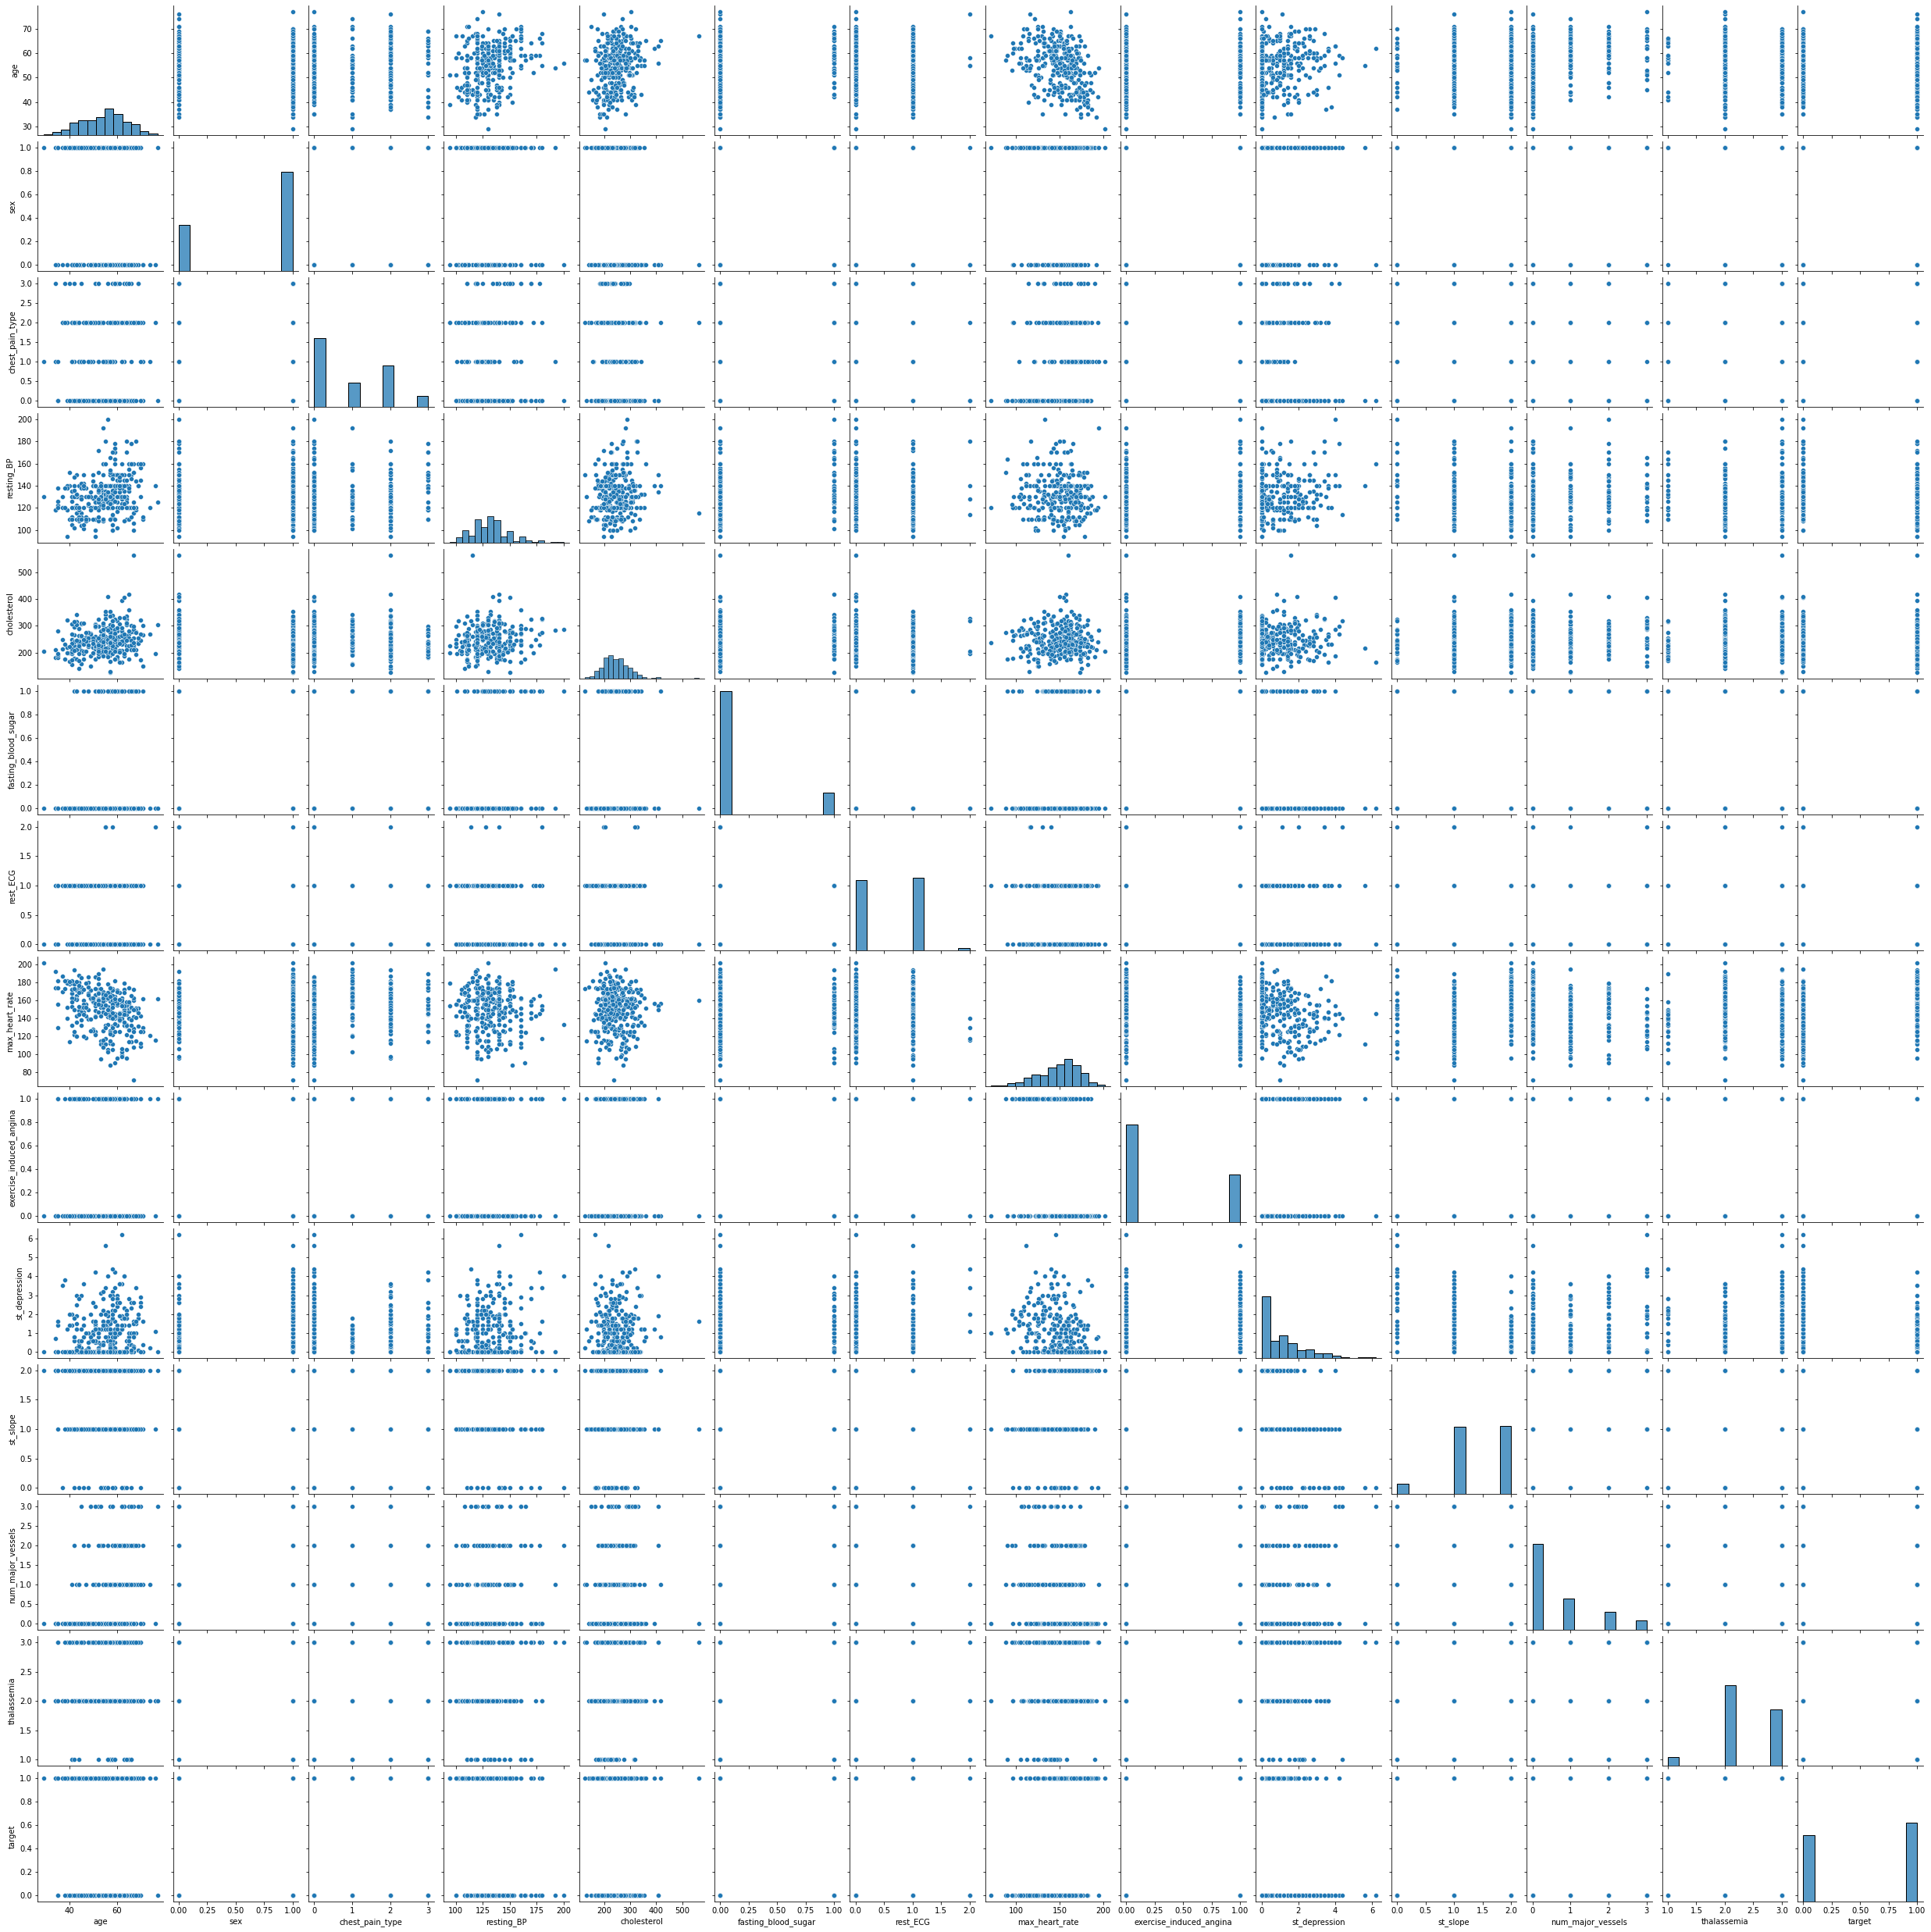

In [27]:
sns.pairplot(df)

* Analysing relationship between every column with target as the hue

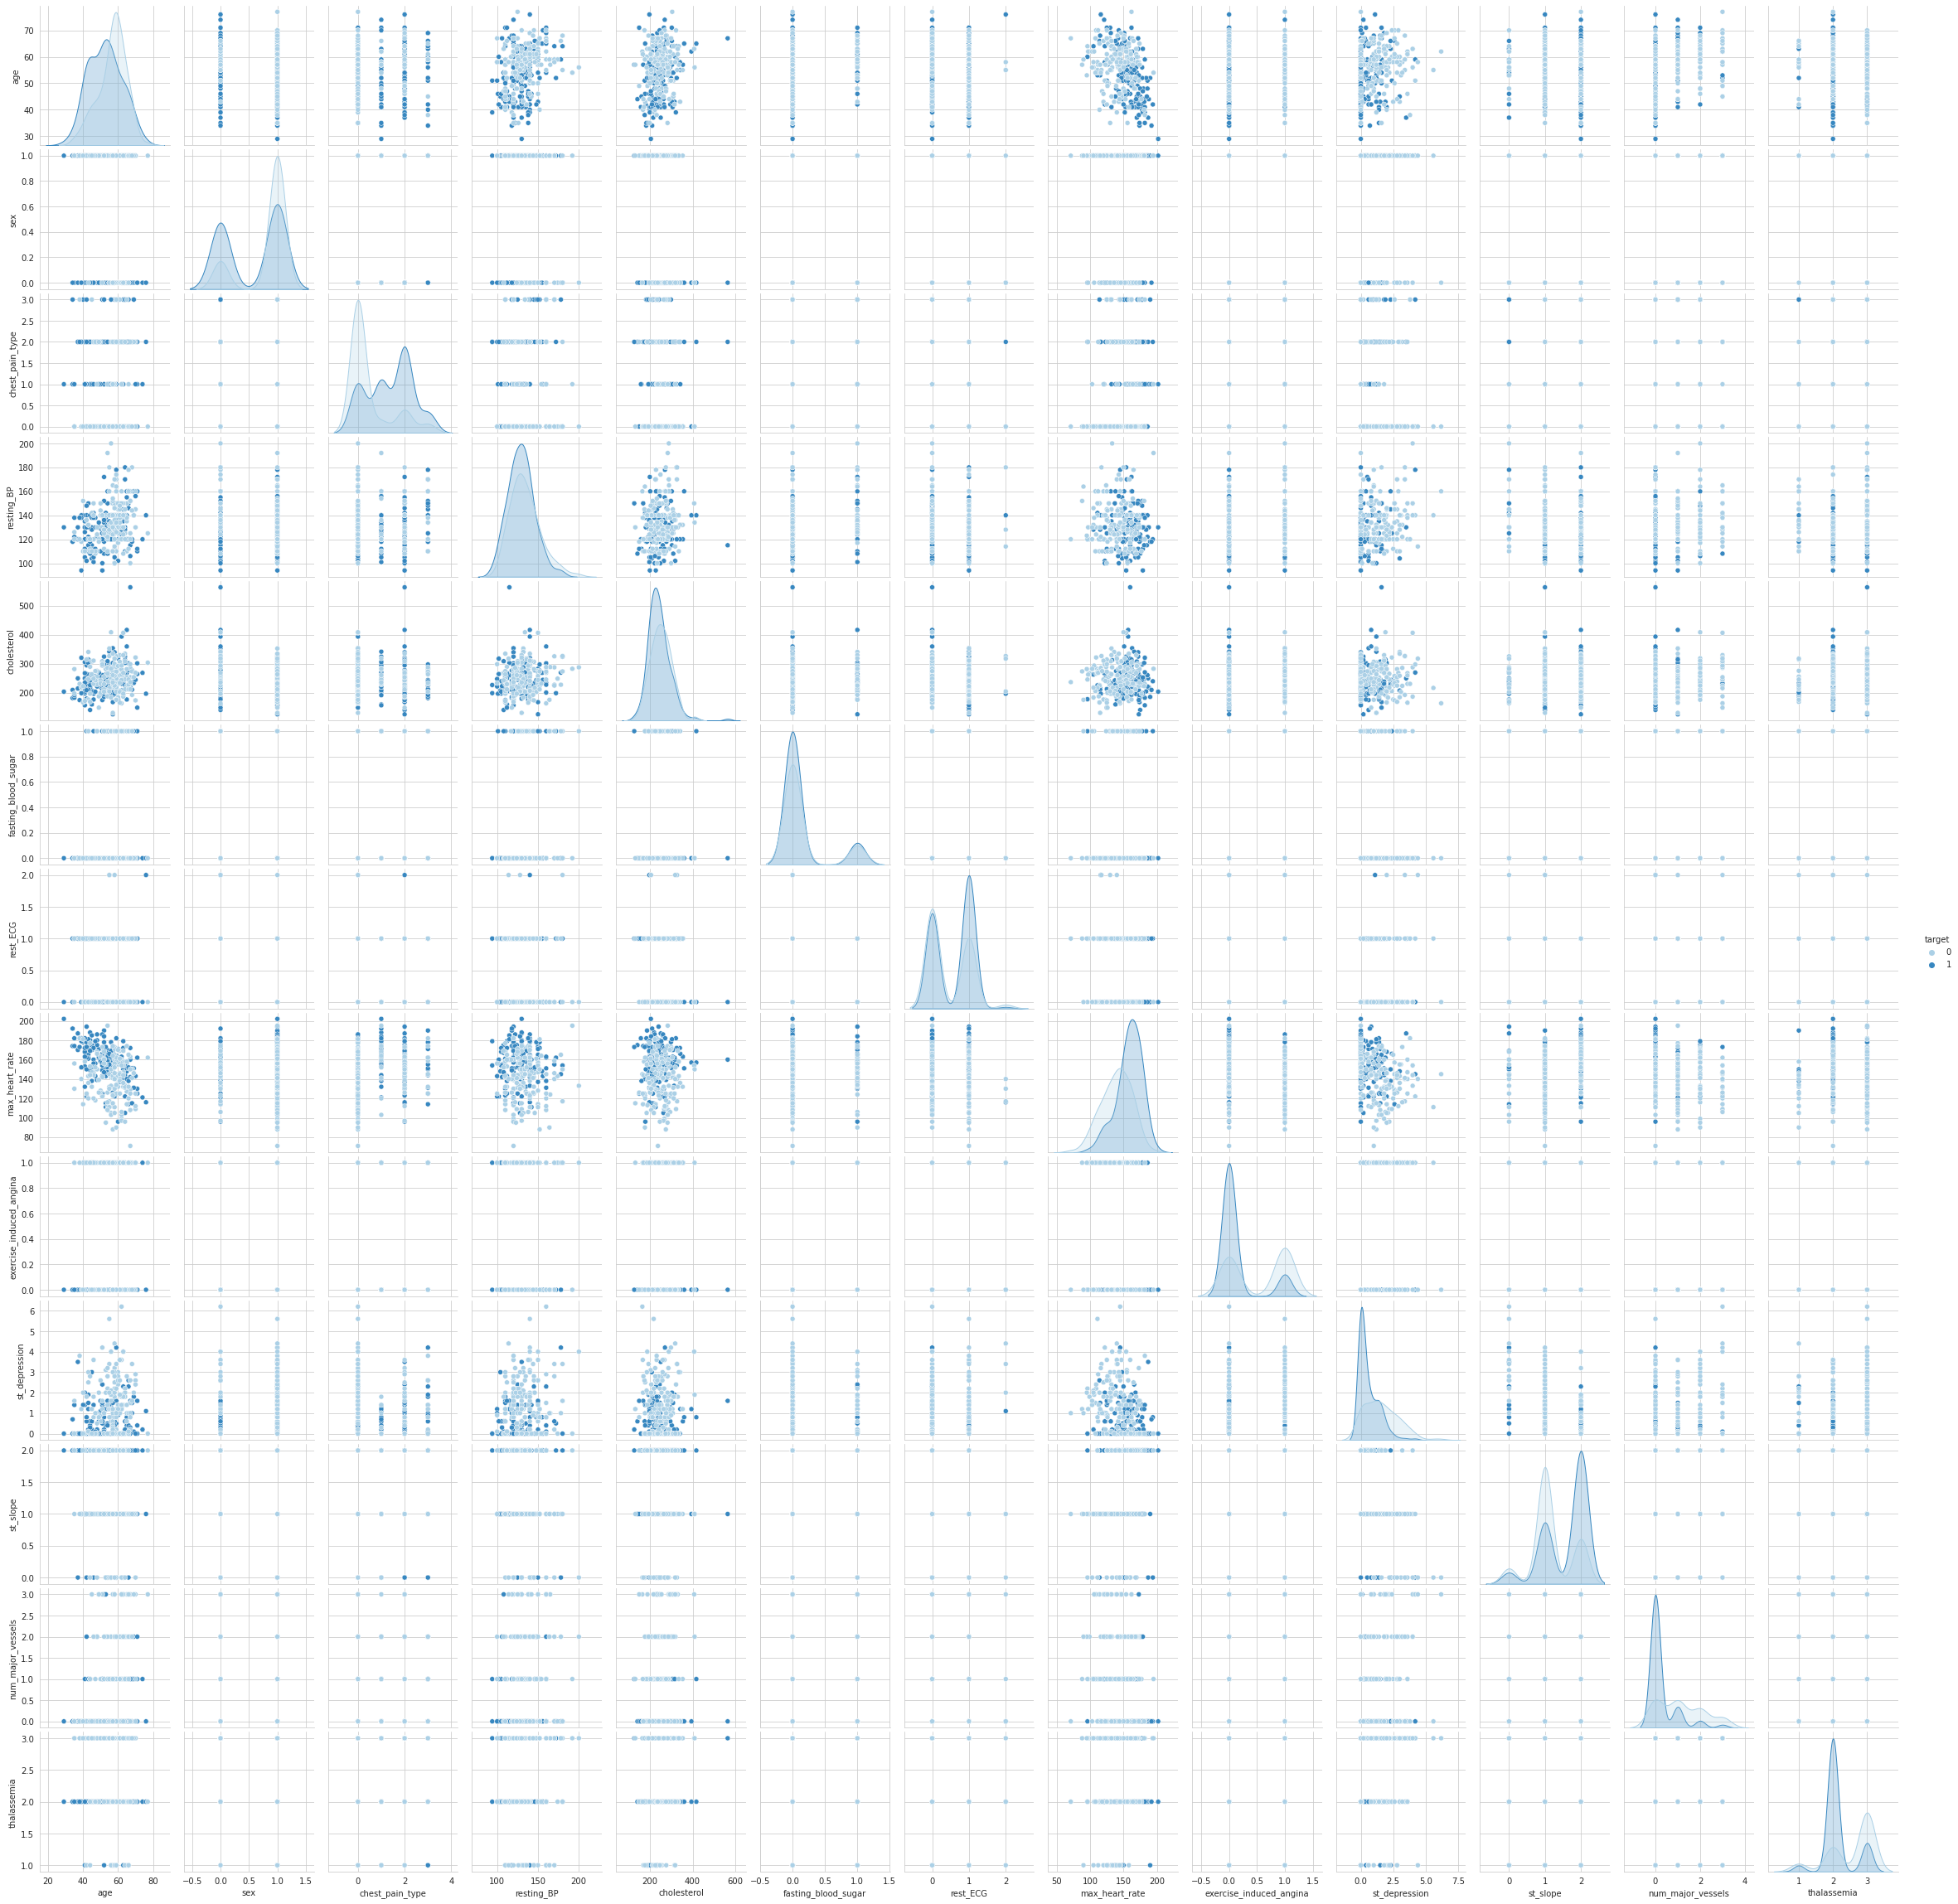

In [58]:
sns.pairplot(df, hue="target", palette="Blues")

> Observing the range of values and distribution of the 'age' column. 
* Seems fairly distrubuted with none or few outliers*

<AxesSubplot:xlabel='age', ylabel='Count'>

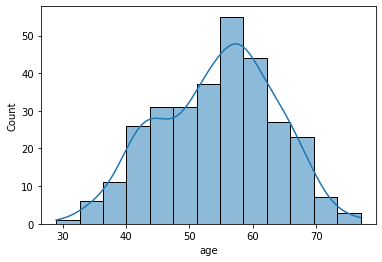

In [29]:
sns.histplot(df.age, kde=True)

* Resting BP column seems to have outliers towards the right of the mean

<AxesSubplot:xlabel='resting_BP', ylabel='Count'>

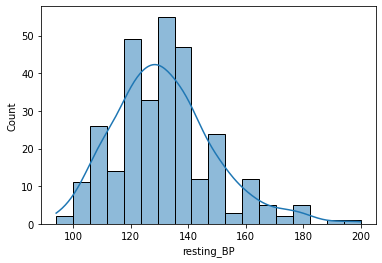

In [30]:
sns.histplot(df.resting_BP, kde=True)

* Cholesterol column seems to have outliers towards the right of the mean

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

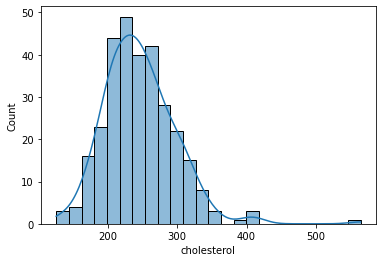

In [31]:
sns.histplot(df.cholesterol, kde=True)

* Max heart rate column seems to have outliers towards the left of the mean

<AxesSubplot:xlabel='max_heart_rate', ylabel='Count'>

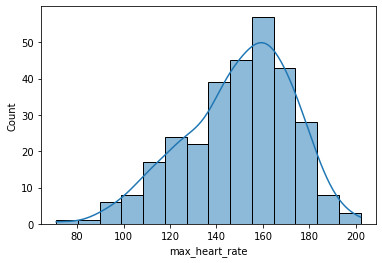

In [32]:
sns.histplot(df.max_heart_rate, kde=True)

> Viewing the relationship between cholesterol and resting_BP
* Patients within the range 100-140 serum resting_BP and range 200-300 of cholesterol seem have presence of heart disease 

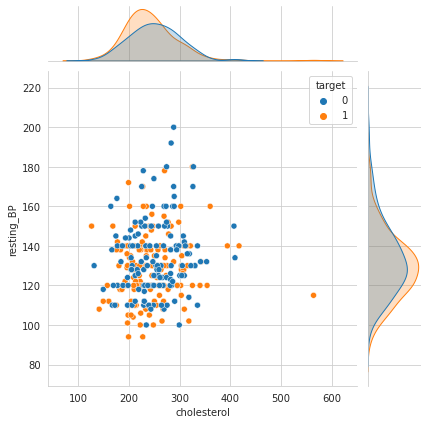

In [60]:
sns.set_style('whitegrid')
sns.jointplot(x="cholesterol", y="resting_BP", hue="target", data=df)

<AxesSubplot:xlabel='st_depression', ylabel='Count'>

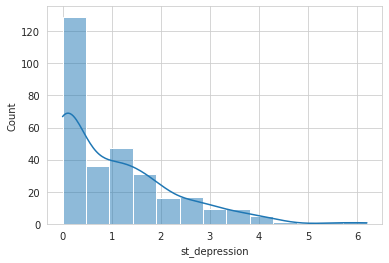

In [34]:
sns.histplot(df.st_depression, kde=True)

> People who belong to the age range 40-60 seem to have presence of heart disease

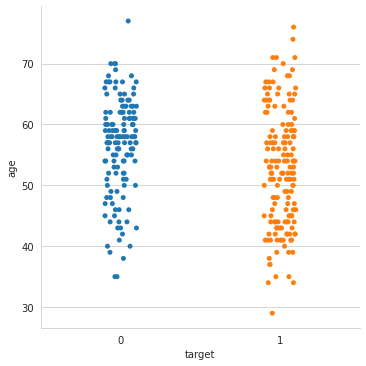

In [35]:
sns.catplot(x="target", y="age", data=df)

> It can be observed that more men have presence of heart disease compared to women

<AxesSubplot:xlabel='target', ylabel='count'>

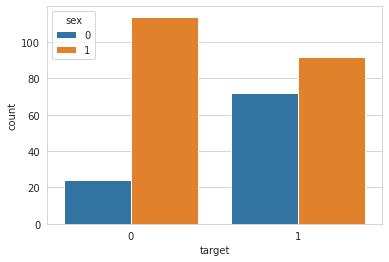

In [62]:
sns.countplot(x="target", hue="sex", data=df)

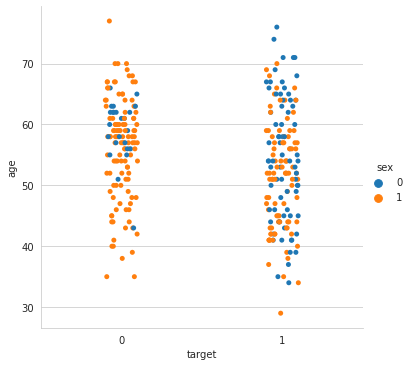

In [36]:
sns.catplot(x="target", y="age", hue="sex", data=df)

> The range of Resting Blood pressure in people with a heart disease is: 100-160

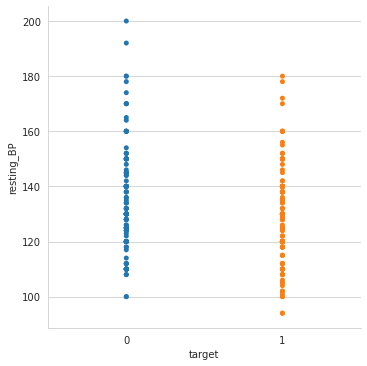

In [37]:
sns.catplot(x="target", y="resting_BP", jitter=False, data=df)

> People with a heart disease are seen to have a higher serum cholesterol value compared to those with the absence of heart disease 

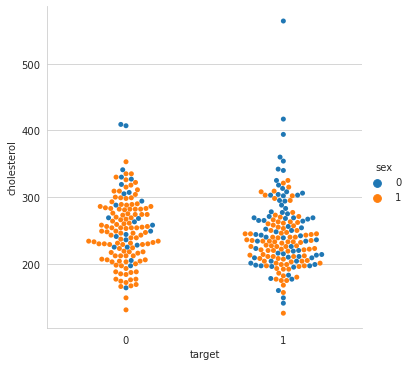

In [38]:
sns.catplot(x="target", y="cholesterol", kind="swarm", hue="sex", data=df)

> People with Thalassemia defect type 2 are most proned to have a heart disease

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

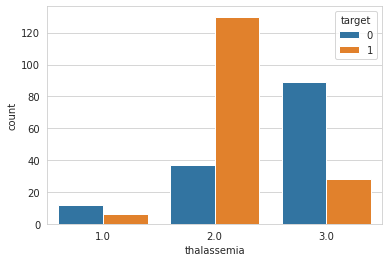

In [63]:
sns.countplot(x="thalassemia" ,hue="target", data=df)

> Patients with thalassemia defect type 2 having heart disease are observed to have resting blood sugar value in the range 120-140

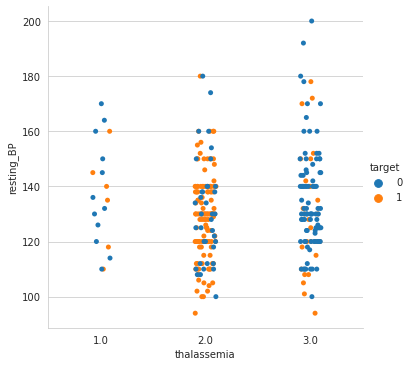

In [39]:
sns.catplot(x="thalassemia", y="resting_BP",hue="target", data=df)

> Patients with 0 unblocked major vessels are more susceptible to heart disease as well as higher pressure in ST segment of the wave in person's ECG 

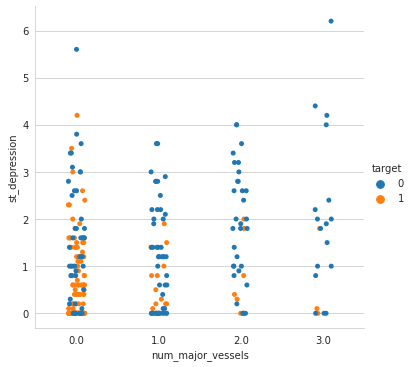

In [40]:
sns.catplot(x="num_major_vessels", y="st_depression", hue="target", data=df)

In [41]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_BP', 'cholesterol',
       'fasting_blood_sugar', 'rest_ECG', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

> Patients with chest pain type 0 have higher cholesterol range as well as are more prone to have a heart disease

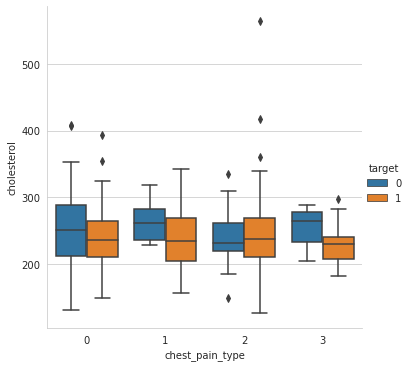

In [43]:
sns.catplot(x="chest_pain_type", y="cholesterol", kind="box", hue="target", data=df)


Relationsjip between st slope values and resting BP seem fairly similar 

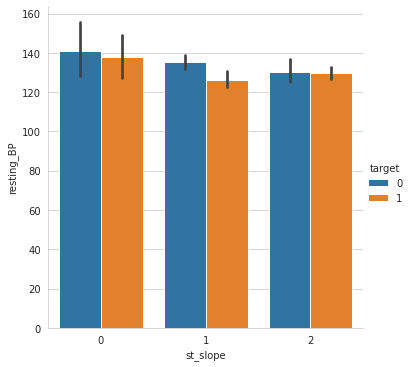

In [44]:
sns.catplot(x="st_slope", y="resting_BP", kind="bar", hue="target", data=df)

> Females have a higher range of serum cholesterol than men

<AxesSubplot:xlabel='sex', ylabel='cholesterol'>

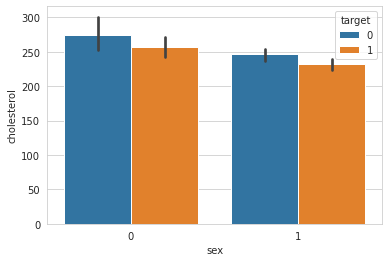

In [64]:
sns.barplot(x="sex", y="cholesterol", hue="target", data=df)

> More than 160 people in the dataset seem to have a heart disease. This is more than half the dataset observations

<AxesSubplot:xlabel='target', ylabel='count'>

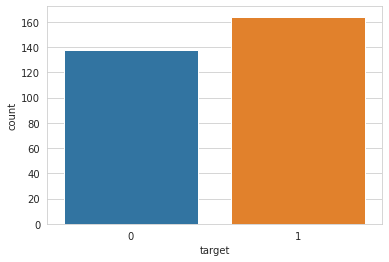

In [46]:
sns.countplot(x="target", data=df)

> In this dataset, men are more susceptible to have a heart disease than women

<AxesSubplot:xlabel='sex', ylabel='count'>

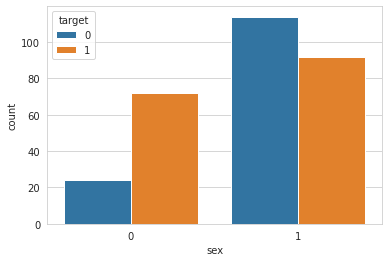

In [47]:
sns.countplot(x="sex", hue="target", data=df)

> In the observations, age column is widely distributed, and those with a heart disease fall in the range: 40-60

<AxesSubplot:xlabel='age', ylabel='count'>

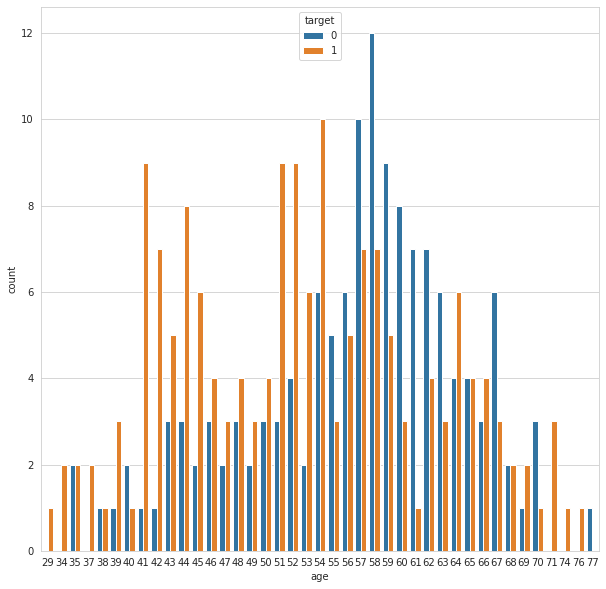

In [65]:
plt.figure(figsize=(10,10,))
sns.countplot(x="age", hue="target", data=df, )

> Patients observing chest pain type 2 are more prone to heart disease

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

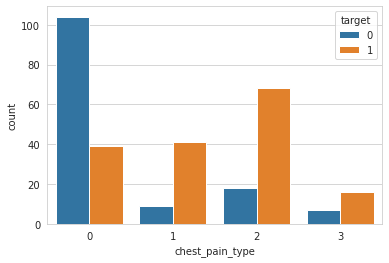

In [49]:
sns.countplot(x="chest_pain_type", hue="target", data=df)

> There are more people with fasting blood sugar < 120 mg/dl compared to those with fasting blood sugar > 120 mg/dl

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

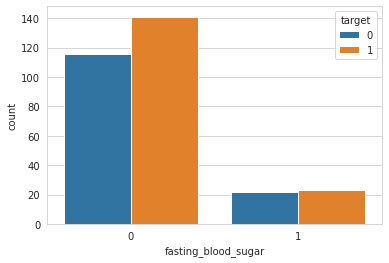

In [50]:
sns.countplot(x="fasting_blood_sugar", hue="target", data=df)

> There are more people with ST-T wave abnormality and have a higher presence of heart disease 

<AxesSubplot:xlabel='rest_ECG', ylabel='count'>

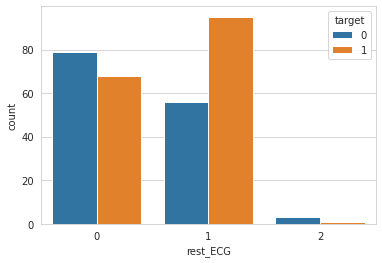

In [51]:
sns.countplot(x="rest_ECG", hue="target", data=df)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

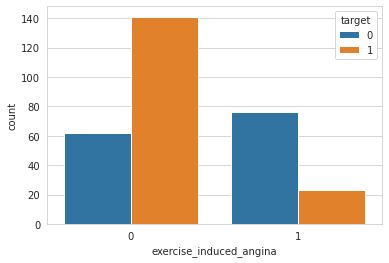

In [52]:
sns.countplot(x="exercise_induced_angina", hue="target", data=df)

> People with a higher maximum heart rate have presence of heart disease

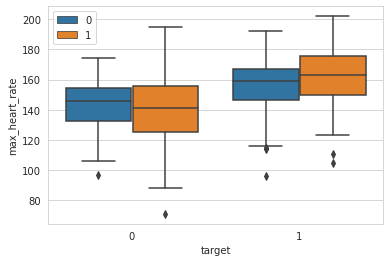

In [66]:
sns.boxplot(x="target", y="max_heart_rate", hue="sex", data=df)
plt.legend(loc=0)

<AxesSubplot:xlabel='chest_pain_type', ylabel='cholesterol'>

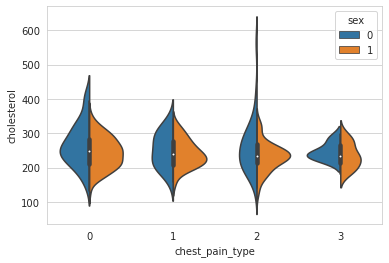

In [54]:
sns.violinplot(x="chest_pain_type", y="cholesterol", hue="sex", data=df, split=True)

> It can be observed that:
* chest_pain_type, max_heart_rate and st_slope are highly positively related to target
* exercise_induced_angina, st_depression, num_major_vessels, and thalassemia are highly negatively related to target

<AxesSubplot:>

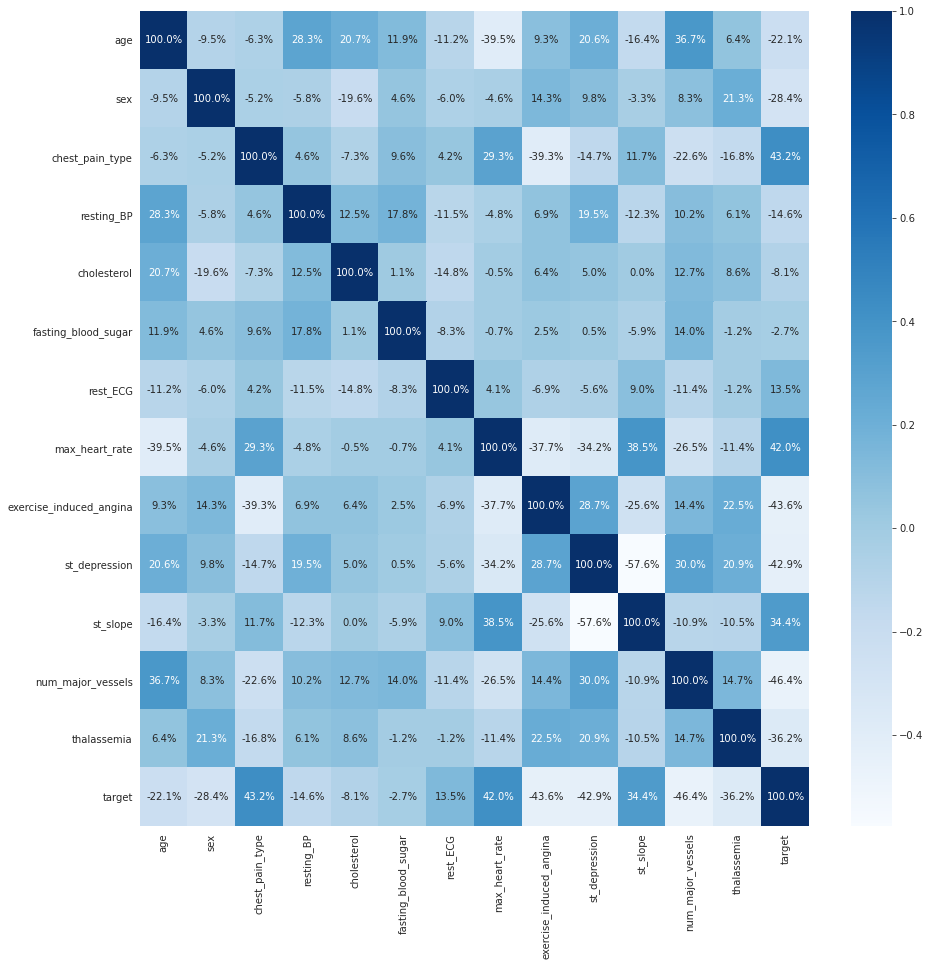

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".1%")

> One hot encoding of categorical values

In [56]:
categorical_values = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ECG', 
                          'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']

# encode the data
data = pd.get_dummies(df, columns=categorical_values, drop_first=True)

In [57]:
data

,age,resting_BP,cholesterol,max_heart_rate,st_depression,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,...,rest_ECG_1,rest_ECG_2,exercise_induced_angina_1,st_slope_1,st_slope_2,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,thalassemia_2.0,thalassemia_3.0
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
